# Image Analysis and Processing
## Assignment 2
### Exercise 2

#### Andrinopoulou Christina (ds2200013)
#### Kalimeris Alexandros (ds1200003)

The code for this exercise is based on the code that was provided in the lectures of the course.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
import math

In [2]:
def hough_pipeline(img, rotation=20):
    image = ndimage.rotate(img, rotation, reshape=False)
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray,50,150,apertureSize = 3)
    lines = cv2.HoughLines(edges,1,np.pi/180,200)
    for line in lines:
        for rho,theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
            cv2.line(image,(x1,y1),(x2,y2),(255,0,0),2)
    return image, lines

In [3]:
def degree_calc(lines):
    theta = lines[0][0][1]
    return (round(math.degrees(theta))+90)%180

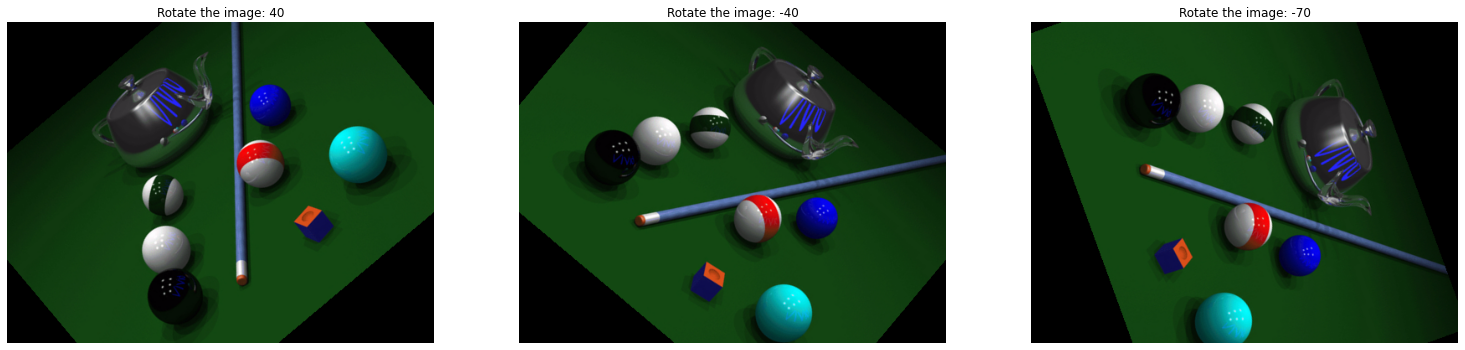

In [6]:
img = cv2.imread('image31.png')

fig, axes = plt.subplots(1, 3, figsize=(26,8))
image = ndimage.rotate(img, 40, reshape=False)
plt.subplot(131), plt.imshow(image), plt.axis('off') 
plt.title('Rotate the image: 40')

image = ndimage.rotate(img, -40, reshape=False)
plt.subplot(132), plt.imshow(image), plt.axis('off') 
plt.title('Rotate the image: -40')

image = ndimage.rotate(img, -70, reshape=False)
plt.subplot(133), plt.imshow(image), plt.axis('off') 
plt.title('Rotate the image: -70')

plt.show()

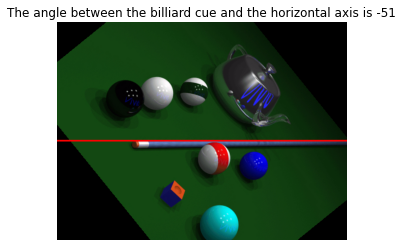

In [4]:
optimal_rotation = 0
for rotation in range(-60,-40,3):
    image, lines = hough_pipeline(img, rotation)
    degree_value = degree_calc(lines)
    if degree_value == 0:
        optimal_rotation = rotation   


image, lines = hough_pipeline(img, rotation=optimal_rotation)
plt.imshow(image), plt.axis('off') 
plt.title("The angle between the billiard cue and the horizontal axis is "+str(optimal_rotation))
plt.show()